# Actividad 3 - Predicción de la gravedad de accidentes
---
Adrian Diaz Manzanares - 22016494

Juan Carlos Jimenez Flores - 22059255

Rodrigo Muñoz Pedraza - 22062417

---

![trafico](https://e00-elmundo.uecdn.es/assets/multimedia/imagenes/2018/08/06/15335560010020.jpg)

El objetivo de la Actividad es seleccionar un modelo de negocio y conjunto de datos al que vamos a aplicar el procedimiento de trabajo que hemos seguido en clase, para ello sucesivamente iremos tratando los datos con los algoritmos de ML (regresión lineal, logística, árboles, bayesiana, random forest, SVM, K-nearest, K-fold, leave-one-out, redes neuronales).

Nuestro proyecto se basa en la <b>predicción de la gravedad de los accidentes en las carreteras</b>. En un principio quisimos realizar la predicción sobre las carreteras de España creando un dataset con los tweets de la cuenta oficial de la DGT pero no logramos una buena precisión, por lo que finalmente utilizamos el dataset [US Accidents](https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents), extraído de Kaggle. Este contiene un conjunto de accidentes automovilísticos de todo el país, que cubre 49 estados de los EE. UU. Los datos de accidentes se recopilan desde febrero de 2016 hasta diciembre de 2021, utilizando múltiples API que proporcionan transmisión de datos de incidentes (o eventos) de tráfico.

Los accidentes se clasifican por <b>4 niveles de gravedad</b> donde 1 indica poco impacto en el tráfico y 4 un gran impacto.

Seguimos los siguientes pasos:
1. Importación y preparación de los datos
2. Análisis exploratorio de datos (EDA)
3. Construcción y evaluación de modelos
4. Conclusiones

# 1. Importación y preparación de los datos

Detalles sobre las características en el conjunto de datos:

<b>Atributos de tráfico (12):</b>

- ID: Este es un identificador único del registro de accidentes.

- TMC: un accidente de tráfico puede tener un código de canal de mensajes de tráfico (TMC) que proporciona una descripción más detallada del evento.

- Severity: muestra la gravedad del accidente, un número entre 1 y 4, donde 1 indica el menor impacto en el tráfico (es decir, un retraso breve como resultado del accidente) y 4 indica un impacto significativo en el tráfico (es decir, un retraso prolongado). .

- Start_Time: muestra la hora de inicio del accidente en la zona horaria local.

- End_Time: muestra la hora de finalización del accidente en la zona horaria local.

- Start_Lat: muestra la latitud en coordenadas GPS del punto de inicio.

- Start_Lng: muestra la longitud en coordenadas GPS del punto de inicio.

- End_Lat: muestra la latitud en coordenadas GPS del punto final.

- End_Lng: muestra la longitud en coordenadas GPS del punto final.

- Distance (mi): La longitud de la extensión de la carretera afectada por el accidente.

- Description: Muestra la descripción del accidente en lenguaje natural.

<b>Atributos de dirección (9):</b>

- Number: Muestra el número de la calle en el campo de dirección.

- Street: Muestra el nombre de la calle en el campo de dirección.

- Side: Muestra el lado relativo de la calle (Derecha/Izquierda) en el campo de dirección.

- City: Muestra la ciudad en el campo de dirección.

- County: Muestra el condado en el campo de dirección.

- State: Muestra el estado en el campo de dirección.

- Zipcode: muestra el código postal en el campo de dirección.

- Country: Muestra el país en el campo de dirección.

- Timezone: muestra la zona horaria según la ubicación del accidente (este, centro, etc.).

<b>Atributos del tiempo (11):</b>

- Airport_Code: indica una estación meteorológica basada en el aeropuerto que es la más cercana al lugar del accidente.

- Weather_Timestamp: muestra la marca de tiempo del registro de observación meteorológica (en hora local).

- Temperature (F): Muestra la temperatura (en Fahrenheit).

- Wind_Chill(F): muestra la sensación térmica (en Fahrenheit).

- Humidity (%): Muestra la humedad (en porcentaje).

- Pressure (en): muestra la presión del aire (en pulgadas).

- Visibility (mi): muestra la visibilidad (en millas).

- Wind_Direction: muestra la dirección del viento.

- Wind_Speed(mph): Muestra la velocidad del viento (en millas por hora).

- Precipitation (en): Muestra la cantidad de precipitación en pulgadas, si hay alguna.

- Weather_Condition: muestra las condiciones meteorológicas (lluvia, nieve, tormenta eléctrica, niebla, etc.).

<b>Atributos de puntos de interés (13):</b>

- Service: una anotación de punto de interés (POI) que indica la presencia de un servicio en una ubicación cercana.

- Bump: una anotación de PDI que indica la presencia de badenes o jorobas en un lugar cercano.

- Crossing: una anotación de PDI que indica la presencia de un cruce en un lugar cercano.

- Give_Way: una anotación de punto de interés que indica la presencia de una señal de give_way en una ubicación cercana.

- Junction: una anotación de PDI que indica la presencia de un cruce en una ubicación cercana.

- No_Exit: una anotación de PDI que indica la presencia de una señal de no_exit en una ubicación cercana.

- Railway: una anotación de PDI que indica la presencia de ferrocarril en un lugar cercano.

- Roundabout: una anotación de PDI que indica la presencia de una rotonda en una ubicación cercana.

- Station: una anotación de PDI que indica la presencia de una estación (autobús, tren, etc.) en una ubicación cercana.

- Stop: una anotación de PDI que indica la presencia de una señal de alto en un lugar cercano.

- Traffic_Calming: una anotación de PDI que indica la presencia de medios de Traffic_Calming en una ubicación cercana.

- Traffic_Signal: una anotación de PDI que indica la presencia de traffic_signal en una ubicación cercana.

- Turning_Loop: una anotación de PDI que indica la presencia de turning_loop en una ubicación cercana.

<b>Período de día (4):</b>

- Sunrise_Sunset: muestra el período del día (es decir, día o noche) en función del amanecer/atardecer.

- Civil_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo civil.

- Nautical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo náutico.

- Astronomical_Twilight: Muestra el período del día (es decir, día o noche) basado en el crepúsculo astronómico.

Importamos los datos utilizando pandas y obtenemos 10000 filas de cada nivel de gravedad que nuestro conjunto de datos sea uniforme.

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

df_all = pd.read_csv("US_Accidents_Dec21_updated.csv", sep=",")

In [2]:
df1 = df_all[df_all["Severity"] == 1]
df1 = df1.iloc[:10000]
df2 = df_all[df_all["Severity"] == 2]
df2 = df2.iloc[:10000]
df3 = df_all[df_all["Severity"] == 3]
df3 = df3.iloc[:10000]
df4 = df_all[df_all["Severity"] == 4]
df4 = df4.iloc[:10000]

In [3]:
df = pd.concat([df1,df2,df3,df4])
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1735388,A-1735389,1,2020-08-03 14:35:16,2020-08-03 15:20:16,32.20676,-110.98050,32.20676,-110.98050,0.000,At I-10/Freeway - Accident.,...,False,False,True,False,True,False,Day,Day,Day,Day
1736991,A-1736992,1,2020-09-22 16:44:38,2020-09-22 17:29:38,32.38084,-110.96392,32.38084,-110.96392,0.000,At N 1st Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
1749719,A-1749720,1,2020-08-03 15:42:10,2020-08-03 15:57:10,41.37978,-81.99410,41.37978,-81.99410,0.000,At I-80 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1751859,A-1751860,1,2020-09-22 16:29:33,2020-09-22 17:14:33,33.63950,-112.13436,33.63950,-112.13436,0.000,At N 35th Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
1753408,A-1753409,1,2020-08-03 13:41:01,2020-08-03 13:56:01,38.08320,-122.11450,38.08320,-122.11450,0.000,At Lake Herman Rd - Accident. Hard shoulder bl...,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80334,A-80335,4,2016-06-22 15:24:08,2016-06-22 21:24:08,40.42586,-79.67489,40.42244,-79.66165,0.735,Closed at Old William Penn Hwy - Road closed d...,...,False,False,True,False,False,False,Day,Day,Day,Day
80347,A-80348,4,2016-06-22 15:40:54,2016-06-22 21:40:54,41.52357,-81.26492,41.52735,-81.25632,0.516,Closed at Fowlers Mill Rd - Road closed due to...,...,False,False,False,False,False,False,Day,Day,Day,Day
80349,A-80350,4,2016-06-22 15:40:54,2016-06-22 21:40:54,41.52735,-81.25632,41.52357,-81.26492,0.516,Closed at Butternut Rd - Road closed due to ac...,...,False,False,False,False,False,False,Day,Day,Day,Day
80356,A-80357,4,2016-06-22 15:57:36,2016-06-22 21:57:36,29.15246,-81.07381,29.22635,-81.10525,5.446,Closed between I-4/SR-400/Exit 260 and CR-4019...,...,False,False,False,False,False,False,Day,Day,Day,Day


Eliminamos las columnas repetidas y las que tienen datos nulos en su mayoría.

In [4]:
df = df.drop(['End_Lat', 'End_Lng', 'Number', 'Wind_Chill(F)', 'Precipitation(in)'], axis=1)

In [5]:
df = df.dropna(axis=0).reset_index(drop=True)

Eliminamos las columnas que no tienen datos relevantes a la hora de predecir la gravedad del accidente como la calle, ciudad, código postal y país debido a que con la latitud y longitud es suficiente información para saber la localización del accidente.

In [6]:
df = df.drop(['ID', 'Description', 'Street', 'City', 'Zipcode', 'Country'], axis=1)

Dividimos las fechas de cada columna por mes y año para mejorar la precisión del modelo

In [7]:
def get_years(df, column):
    return df[column].apply(lambda date: date[0:4])

def get_months(df, column):
    return df[column].apply(lambda date: date[5:7])

In [8]:
df['Start_Time_Month'] = get_months(df, 'Start_Time')
df['Start_Time_Year'] = get_years(df, 'Start_Time')
df['End_Time_Month'] = get_months(df, 'End_Time')
df['End_Time_Year'] = get_years(df, 'End_Time')
df['Weather_Timestamp_Month'] = get_months(df, 'Weather_Timestamp')
df['Weather_Timestamp_Year'] = get_years(df, 'Weather_Timestamp')

df = df.drop(['Start_Time', 'End_Time', 'Weather_Timestamp'], axis=1)

Para poder utilizar variables categóricas en nuestro modelos, es necesario aplicar una codificación One-Hot para crear una columna por cada valor distinto que exista, marcando con un 1 la columna a la que pertenezca dicho registro y dejando las demás con un 0

In [9]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

Aplicamos la codificación a todas las variables categóricas

In [10]:
df = onehot_encode(df, columns=['Side', 'County', 'State', 'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition'], prefixes=['SI', 'CO', 'ST', 'TZ', 'AC', 'WD', 'WC'])

Las columnas restantes también son categóricas, pero únicamente disponen de dos categorías (noche y día), por lo que reemplazamos el día por un 1 y la noche por un 0

In [11]:
def get_binary_column(df, column):
    return df[column].apply(lambda x: 1 if x == 'Day' else 0)

In [12]:
df['Sunrise_Sunset'] = get_binary_column(df, 'Sunrise_Sunset')
df['Civil_Twilight'] = get_binary_column(df, 'Civil_Twilight')
df['Nautical_Twilight'] = get_binary_column(df, 'Nautical_Twilight')
df['Astronomical_Twilight'] = get_binary_column(df, 'Astronomical_Twilight')

Asignamos la "<b>X</b>" (todas las columnas menos las gravedad) y la "<b>y</b>" (gravedad del accidente)

In [13]:
y = df['Severity'].copy()
X = df.drop('Severity', axis=1).copy()

In [14]:
y.unique()

array([1, 2, 3, 4])

# 2. Análisis exploratorio de datos (EDA)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

Cargamos todos los datos para el análisis

In [16]:
eda_df = pd.read_csv("US_Accidents_Dec21_updated.csv", sep=",")

In [17]:
def random_colors(n):
    colors = []
    for i in range(n):
        colors.append((np.random.random(), np.random.random(), np.random.random()))
    return colors

<b>Número de accidentes por estados</b><br>
La mayoría de accidentes se producen en el estado de California

<AxesSubplot: >

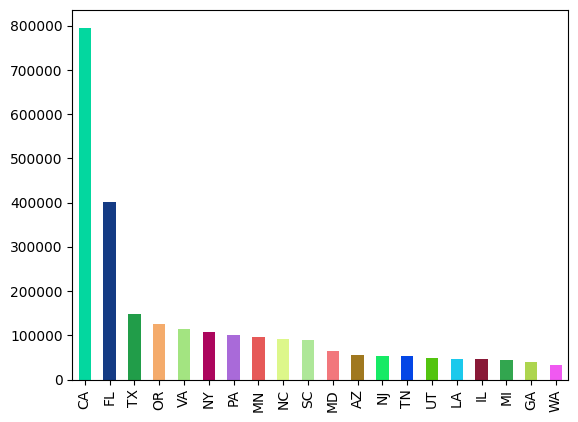

In [18]:
state_accidents = eda_df["State"].value_counts()
colors = random_colors(20)
state_accidents[:20].plot(kind = 'bar', color = colors)

<b>Figura 1.</b> Gráfica de barras de la cantidad de accidentes por estado en Estados Unidos

<b>Número de accidentes por ciudades ciudades</b><br>
La mayoría de accidentes se producen en Miami

<AxesSubplot: >

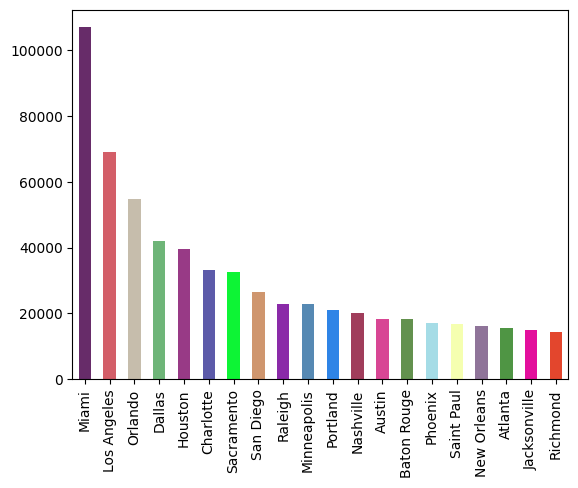

In [19]:
cities_accidents = eda_df["City"].value_counts()
colors = random_colors(20)
cities_accidents[:20].plot(kind = 'bar',color=colors)

<b>Figura 2.</b> Gráfica de barras de la cantidad de accidentes por ciudad en Estados Unidos

<b>Cantidad de accidentes según la gravedad</b><br>
La mayoría de accidentes son de nivel de gravedad 2

<AxesSubplot: ylabel='Severity'>

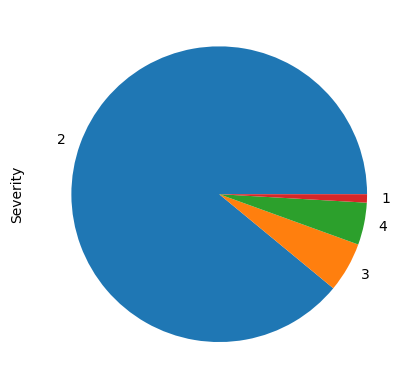

In [20]:
severities_accidents = eda_df["Severity"].value_counts()
colors = random_colors(20)
severities_accidents.plot(kind = 'pie')

<b>Figura 3.</b> Gráfica de barras de la gravedad de los accidentes en Estados Unidos

<b>Accidentes por hora</b><br>
La mayoría de accidentes se producen a las 17 horas

<AxesSubplot: >

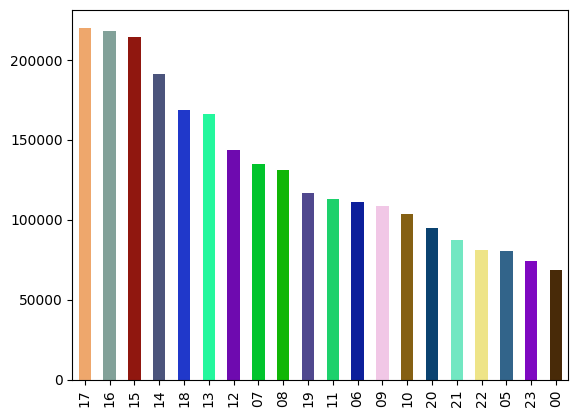

In [21]:
def get_hours(df, column):
    return df[column].apply(lambda date: date[11:13])

hour_accidents = get_hours(eda_df, "Start_Time")
hour_accidents = hour_accidents.value_counts()
colors = random_colors(20)
hour_accidents[:20].plot(kind = 'bar', color = colors)

<b>Figura 4.</b> Gráfica de barras de la cantidad de accidentes por hora en Estados Unidos

<b>Accidentes por condición meteorológica</b><br>
Los accidentes no son más frecuentes en condiciones meteorológicas adversas

<AxesSubplot: >

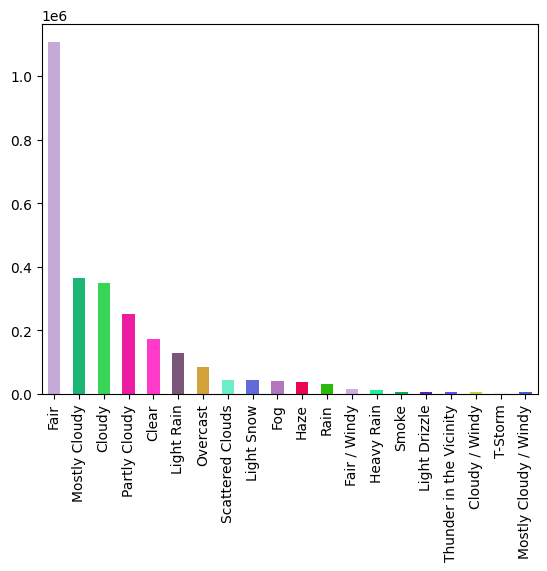

In [22]:
weather_accidents = eda_df["Weather_Condition"].value_counts()
colors = random_colors(20)
weather_accidents[:20].plot(kind = 'bar', color = colors)

<b>Figura 5.</b> Gráfica de barras de la cantidad de accidentes por condición meteorológica en Estados Unidos

<b>Accidentes de gravedad 4 por condición meteorológica</b><br>
Los accidentes más graves se producen en condiciones meteorológicas normales

<AxesSubplot: >

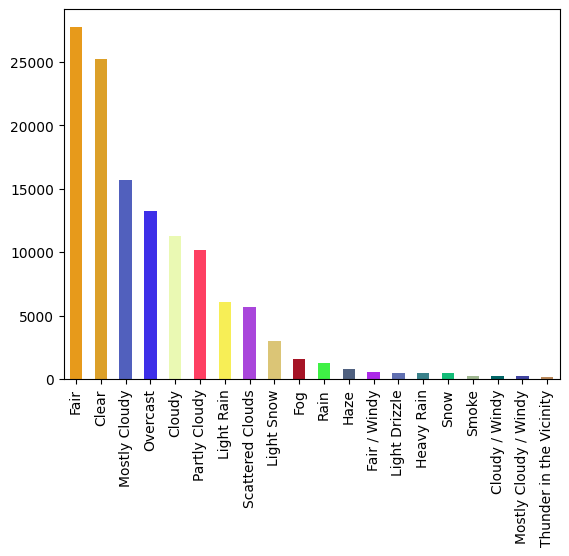

In [23]:
sev4 = eda_df[eda_df["Severity"] == 4]
sev4 = sev4["Weather_Condition"].value_counts()
colors = random_colors(20)
sev4[:20].plot(kind = 'bar', color = colors)

<b>Figura 6.</b> Gráfica de barras de la cantidad de accidentes de gravedad 4 por condición meteorológica en Estados Unidos

# 3. Construcción y evaluación de modelos

![explicabilidad y rendimiento](https://www.mathworks.com/discovery/interpretability/_jcr_content/mainParsys/image.adapt.full.medium.svg/1670433657216.svg)

<b>Figura 7.</b> Explicabilidad del modelo frente al rendimiento de este para los diferentes algoritmos de machine learning

La solución ideal debe tener tanto una alta explicabilidad como un alto rendimiento. Sin embargo, los modelos lineales existentes, los modelos basados en reglas y los árboles de decisión son más transparentes, pero con un rendimiento más bajo en general. Por el contrario, los modelos complejos, por ejemplo, el aprendizaje profundo y los conjuntos, manifiestan un mayor rendimiento mientras que se puede obtener una menor explicabilidad.

Dividimos el dataset para entrenar y probar el modelo con datos diferentes

In [24]:
from sklearn.model_selection import train_test_split
X = X.astype(np.float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100, stratify = df["Severity"])

In [25]:
def draw_conf_mat(conf_mat):
    plt.figure(figsize = (8, 5))
    sns.heatmap(conf_mat, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15},
               yticklabels = ['1','2', '3','4'], xticklabels = ['1','2', '3', '4'])
    plt.yticks(rotation = 0)
    plt.show()

## Regresión Lineal

![regresion lineal](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/1200px-Linear_regression.svg.png)

En nuestro caso no podemos utilizar el modelo de regresión lineal debido a que no obtenemos una clasificación.

## Random forest

![random forest](https://1.cms.s81c.com/sites/default/files/2020-12-07/Random%20Forest%20Diagram.jpg)

Es una combinacion de <b> árboles predictores </b>, cada árbol depende de los valores de un vector aleatorio probado independientemente y con la misma distribución para cada uno

In [26]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 7, n_estimators=100)
rf.fit(X_train, y_train)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]
conf_mat = confusion_matrix(y_test, y_pred)
prediction_rf = rf.predict(X_test)
print(classification_report(y_test, prediction_rf))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2941
           2       0.87      0.97      0.92      2504
           3       0.84      0.79      0.82      2491
           4       0.89      0.84      0.87      2292

    accuracy                           0.91     10228
   macro avg       0.90      0.90      0.90     10228
weighted avg       0.91      0.91      0.90     10228



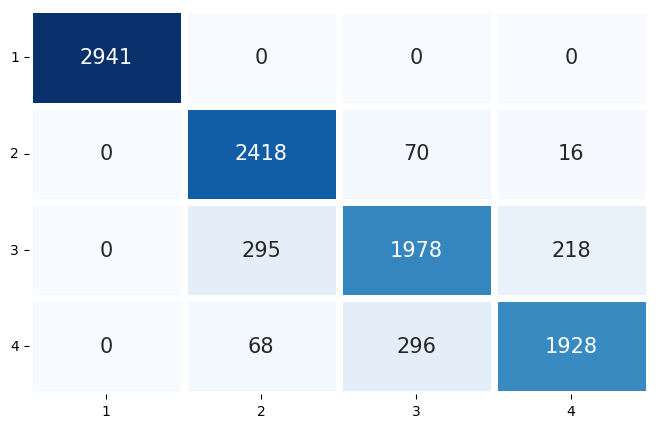

In [27]:
draw_conf_mat(conf_mat)

## Regresión Logística

![regresion logistica](https://www.statdeveloper.com/wp-content/uploads/2020/02/curva-sigmoide.png)

Tipo de análisis de regresión utilizado para predecir el resultado de una variable en función de las variables independientes (útil para modelar la probabilidad de un evento ocurriendo en función de otros factores)


In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lg = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=7)
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)
y_prob = lg.predict_proba(X_test)[:,1]
conf_mat = confusion_matrix(y_test, y_pred)
prediction_lg = lg.predict(X_test)
print(classification_report(y_test, prediction_lg))

              precision    recall  f1-score   support

           1       0.95      0.94      0.95      2941
           2       0.82      0.92      0.87      2504
           3       0.79      0.67      0.73      2491
           4       0.75      0.79      0.77      2292

    accuracy                           0.84     10228
   macro avg       0.83      0.83      0.83     10228
weighted avg       0.84      0.84      0.84     10228



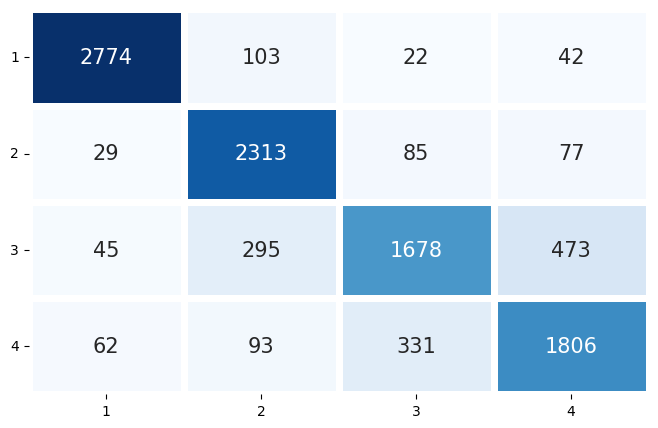

In [30]:
draw_conf_mat(conf_mat)

## Bayes

![bayes](https://editor.analyticsvidhya.com/uploads/23385Capture6.PNG)

Clasificador fundamentado en el <b> teorema de Bayes </b> (independencia entre las variables predictoras)

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
y_prob = gnb.predict_proba(X_test)[:,1]
conf_mat = confusion_matrix(y_test, y_pred)
prediction_bay = gnb.predict(X_test)
print(classification_report(y_test, prediction_bay))

              precision    recall  f1-score   support

           1       1.00      0.97      0.98      2941
           2       0.63      0.98      0.77      2504
           3       0.54      0.51      0.52      2491
           4       0.87      0.43      0.58      2292

    accuracy                           0.74     10228
   macro avg       0.76      0.72      0.71     10228
weighted avg       0.77      0.74      0.73     10228



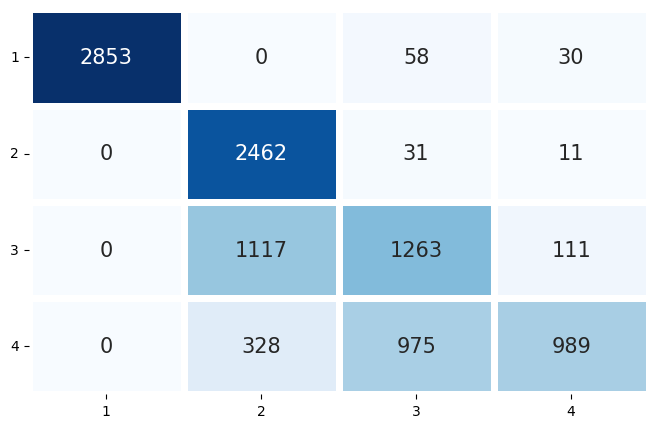

In [33]:
draw_conf_mat(conf_mat)

## Árbol de Clasificación

![arbol de clasificacion](https://bookdown.org/content/2031/images/decision_tree_histograms.png)

Se basa en árboles de decision, predice el valor de una variable de destino en función de diversas variables de entrada

In [34]:
from sklearn import tree
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score


In [35]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
prediction_tree = clf.predict(X_test)
print(classification_report(y_test, prediction_tree))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2941
           2       0.88      0.86      0.87      2504
           3       0.74      0.74      0.74      2491
           4       0.80      0.82      0.81      2292

    accuracy                           0.86     10228
   macro avg       0.86      0.86      0.86     10228
weighted avg       0.86      0.86      0.86     10228



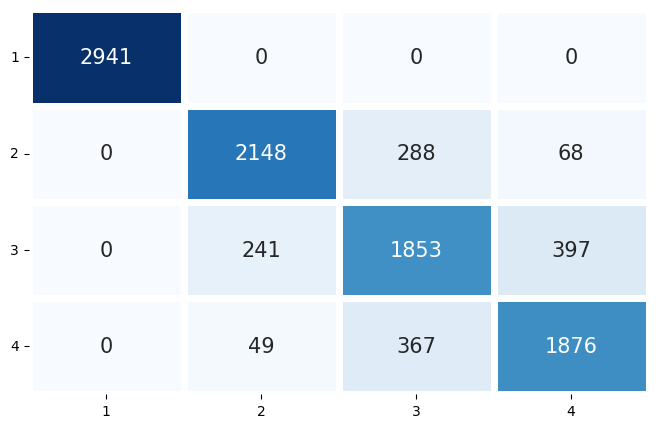

In [36]:
draw_conf_mat(conf_mat)

## Árbol de Regresión

![arbol de regresion](https://fhernanb.github.io/libro_mod_pred/images/ilustracion_arb_regresion.png)

In [37]:
reg = tree.DecisionTreeRegressor()
reg = clf.fit(X_train, y_train)
y_pred = reg.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
prediction_reg = reg.predict(X_test)
print(classification_report(y_test, prediction_reg))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2941
           2       0.88      0.86      0.87      2504
           3       0.74      0.74      0.74      2491
           4       0.80      0.82      0.81      2292

    accuracy                           0.86     10228
   macro avg       0.85      0.85      0.85     10228
weighted avg       0.86      0.86      0.86     10228



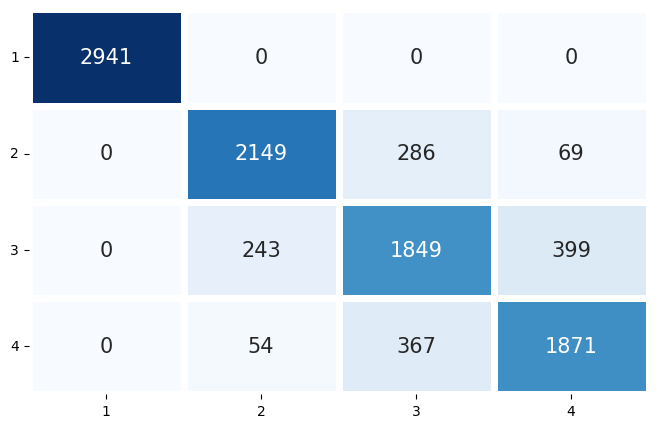

In [38]:
draw_conf_mat(conf_mat)

## Support Vector Machine

![support vector machine](https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526288453/index3_souoaz.png)

Son un conjunto de algoritmos de aprendizaje supervisado. Dado un conjunto de ejemplos de entrenamiento se predice la clase de una nueva muestra

In [39]:
from sklearn.svm import SVC

In [40]:
svc = SVC(kernel = "linear") # Probad con los distintos kernels: kernel = "linear"; kernel = "poly"; kernel = "rbf"; kernel = "sigmoid"
svc = svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
prediction_svc = svc.predict(X_test)
print(classification_report(y_test, prediction_svc))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2941
           2       0.85      0.96      0.90      2504
           3       0.80      0.73      0.76      2491
           4       0.82      0.78      0.80      2292

    accuracy                           0.88     10228
   macro avg       0.87      0.87      0.87     10228
weighted avg       0.87      0.88      0.87     10228



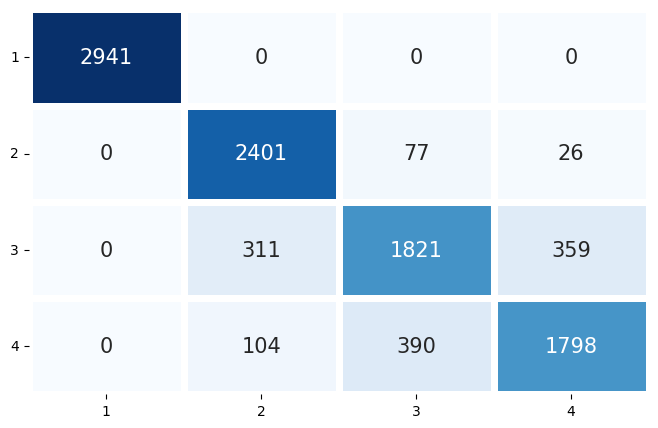

In [41]:
draw_conf_mat(conf_mat)

## K-Nearest

![k nearest](https://www.ibm.com/content/dam/connectedassets-adobe-cms/worldwide-content/cdp/cf/ul/g/ef/3a/KNN.component.xl.ts=1639762044031.png/content/adobe-cms/us/en/topics/knn/jcr:content/root/table_of_contents/intro/complex_narrative/items/content_group/image)

Estima la probabilidad de que un elemento pertenezca a una clase reconociendo patrones

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
nbrs = KNeighborsClassifier()
nbrs = nbrs.fit(X_train, y_train)
y_pred = nbrs.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
prediction_nbrs = nbrs.predict(X_test)
print(classification_report(y_test, prediction_nbrs))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00      2941
           2       0.84      0.96      0.90      2504
           3       0.74      0.71      0.73      2491
           4       0.79      0.71      0.75      2292

    accuracy                           0.85     10228
   macro avg       0.84      0.84      0.84     10228
weighted avg       0.85      0.85      0.85     10228



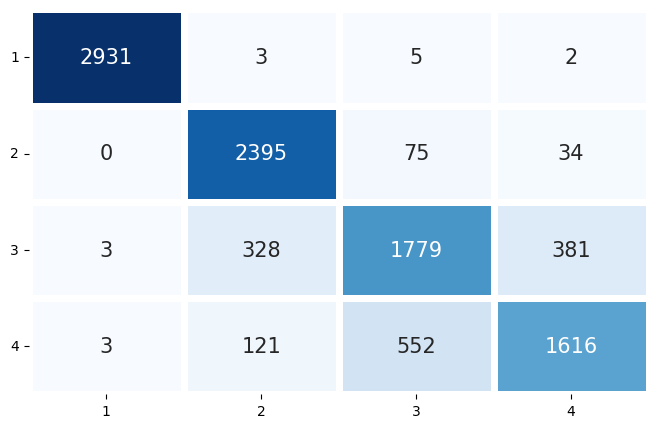

In [44]:
draw_conf_mat(conf_mat)

## Redes neuronales

![redes neuronales](https://1.cms.s81c.com/sites/default/files/2021-01-06/ICLH_Diagram_Batch_01_03-DeepNeuralNetwork-WHITEBG.png)

Emula el modo en el que el cerebro humano procesa la información 

In [61]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp = mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
prediction_mlp = mlp.predict(X_test)
print(classification_report(y_test, prediction_mlp))

              precision    recall  f1-score   support

           1       0.98      0.81      0.89      2941
           2       0.82      0.90      0.86      2504
           3       0.59      0.51      0.55      2491
           4       0.63      0.80      0.71      2292

    accuracy                           0.76     10228
   macro avg       0.76      0.75      0.75     10228
weighted avg       0.77      0.76      0.76     10228



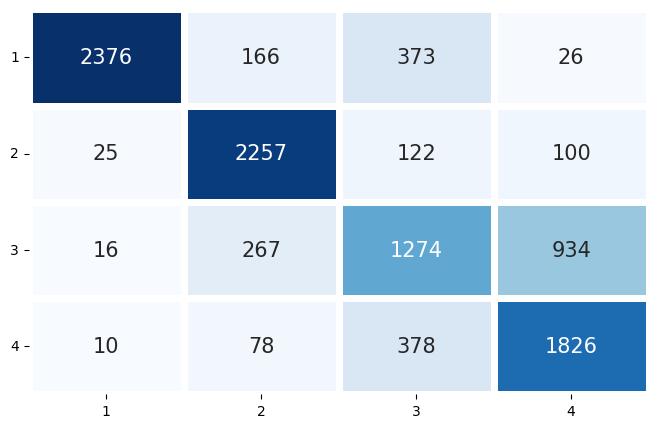

In [62]:
draw_conf_mat(conf_mat)

## XGBoost

![xgboost](https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png)

Suele obtener mayor precisión que los árboles de decisión sacrificando explicabilidad

In [50]:
#pip install xgboost

In [51]:
from xgboost import XGBClassifier

Restamos 1 a los modelos de prueba y entrenamiento debido a que XGBoost empieza su indexado en 0, mientras que nosotros empezamos en 1

In [52]:
y_train_xgb = y_train-1
y_test_xgb = y_test-1

In [53]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import r2_score

xgb = XGBClassifier()
xgb = xgb.fit(X_train, y_train_xgb)
y_pred = xgb.predict(X_test)
conf_mat = confusion_matrix(y_test_xgb, y_pred)
prediction_xgb = xgb.predict(X_test)
print(classification_report(y_test_xgb, prediction_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2941
           1       0.87      0.97      0.91      2504
           2       0.83      0.79      0.81      2491
           3       0.88      0.82      0.85      2292

    accuracy                           0.90     10228
   macro avg       0.89      0.89      0.89     10228
weighted avg       0.90      0.90      0.90     10228



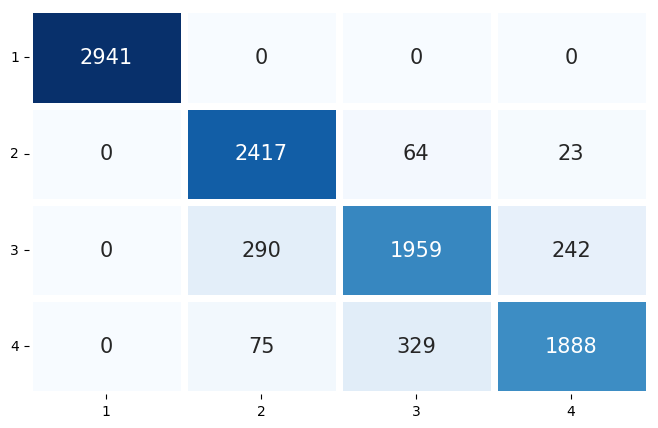

In [54]:
draw_conf_mat(conf_mat)

# 4. Conclusiones

- El estado con más accidentes es <b>California</b>
- La ciudad con más accidentes es <b>Miami</b>
- La mayoría de accidentes son de nivel de <b>gravedad 2</b>
- La mayoría de accidentes se producen a las <b>17 horas</b>
- Los accidentes <b>no</b> son más frecuentes en condiciones meteorológicas adversas
- Los accidentes </b>más graves</b> se producen en condiciones meteorológicas <b>normales</b>
- El mejor algoritmo de clasificación para nuestro modelo es el <b>Random Forest</b>